In [21]:
# Siemens Energy Digitalization Transformation Engineer
# Developed using Python by Heider Jeffer

import pandas as pd
import glob
import os
import datetime

# Ensure output directory exists
os.makedirs("automated_reports", exist_ok=True)

# Step 1: Discover input files
input_pattern = "factory_reports/*.xlsx"
files = glob.glob(input_pattern)

if not files:
    print("⚠️ No files found to process.")
else:
    print(f"Found {len(files)} file(s). Processing...")

    # Step 2: Ingest and combine data
    df_list = []
    for file in files:
        temp = pd.read_excel(file)
        print(f"  -> Ingested {file} with {len(temp)} rows")
        df_list.append(temp)

    df = pd.concat(df_list, ignore_index=True)

    # Step 3: Clean and normalize data
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Production_Units'])

    # Step 4: Data quality checks
    invalid_units = df[df['Production_Units'] < 0]
    if not invalid_units.empty:
        print("⚠️ Found invalid Production_Units (negative values):")
        print(invalid_units)

    # Step 5: Aggregate and summarize
    summary = df.groupby('Date')['Production_Units'].sum().reset_index()

    # Step 6: Export summary report
    today = datetime.date.today()
    output_file = f"automated_reports/summary_report_{today}.xlsx"
    summary.to_excel(output_file, index=False)

    print(f"✅ Automated production summary created: {output_file}")
    display(summary)


Found 1 file(s). Processing...
  -> Ingested factory_reports\report1.xlsx with 20 rows
✅ Automated production summary created: automated_reports/summary_report_2025-09-20.xlsx


,Date,Production_Units
0,2025-09-01,245
1,2025-09-02,195
2,2025-09-03,275
3,2025-09-04,165
4,2025-09-05,310
5,2025-09-06,230
6,2025-09-07,295
7,2025-09-08,185
8,2025-09-09,285
9,2025-09-10,205


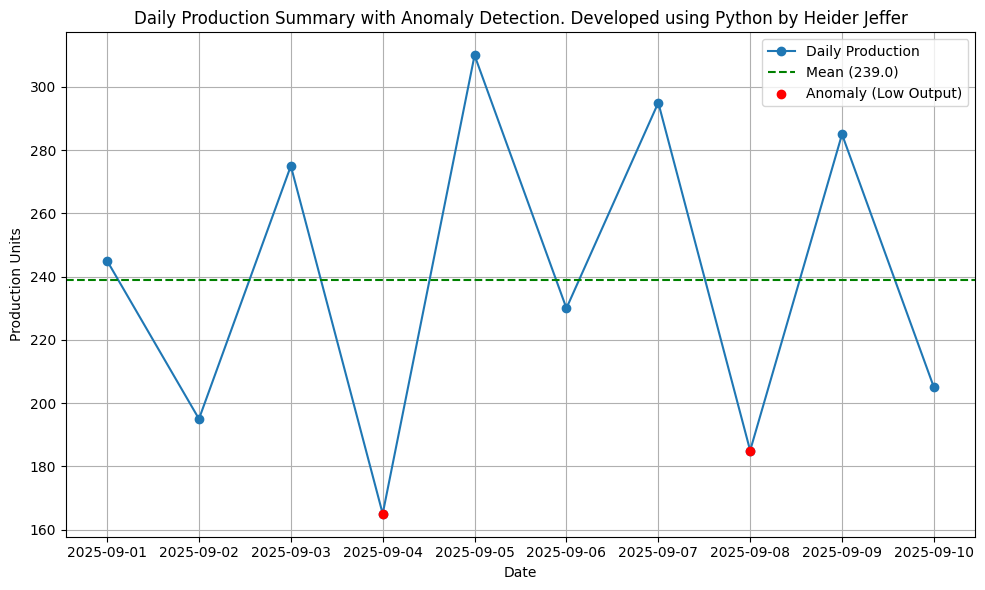

,Date,Production_Units,Anomaly
0,2025-09-01,245,False
1,2025-09-02,195,False
2,2025-09-03,275,False
3,2025-09-04,165,True
4,2025-09-05,310,False
5,2025-09-06,230,False
6,2025-09-07,295,False
7,2025-09-08,185,True
8,2025-09-09,285,False
9,2025-09-10,205,False


In [22]:
# Siemens Energy Digitalization Transformation Engineer
# Developed using Python by Heider Jeffer

import matplotlib.pyplot as plt

# Load the summary data from the generated Excel file
summary = pd.read_excel("automated_reports/summary_report_2025-09-20.xlsx")

# Detect anomalies: mark days with production significantly below average (e.g., < 80% of mean)
mean_units = summary['Production_Units'].mean()
threshold = 0.8 * mean_units
summary['Anomaly'] = summary['Production_Units'] < threshold

# Plot production trends with anomalies highlighted
plt.figure(figsize=(10,6))
plt.plot(summary['Date'], summary['Production_Units'], marker='o', label="Daily Production")
plt.axhline(mean_units, color='green', linestyle='--', label=f"Mean ({mean_units:.1f})")
plt.scatter(summary.loc[summary['Anomaly'], 'Date'],
            summary.loc[summary['Anomaly'], 'Production_Units'],
            color='red', label="Anomaly (Low Output)", zorder=5)
plt.title("Daily Production Summary with Anomaly Detection. Developed using Python by Heider Jeffer")
plt.xlabel("Date")
plt.ylabel("Production Units")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

summary
